<a href="https://colab.research.google.com/github/kimdahyeon977/R-studio/blob/master/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [92]:
###ensemble 및 cross-validation

data= pd.read_csv('https://stats.idre.ucla.edu/stat/data/binary.csv')

In [93]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [95]:
#변수 factor화
data['admit']=data['admit'].astype('category')
data['rank']=data['rank'].astype('category')

data.describe()

,gre,gpa
count,400.000000,400.000000
mean,587.700000,3.389900
std,115.516536,0.380567
min,220.000000,2.260000
25%,520.000000,3.130000
50%,580.000000,3.395000
75%,660.000000,3.670000
max,800.000000,4.000000


In [96]:
#Splitting featuers and target
X = data.drop('admit', axis=1)
y = data['admit']

In [97]:
#### training & test data 분할
np.random.rand(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Bagging & CV

In [98]:
param_grid=[{
'n_estimators':[1,3,5,7,9,11],
'max_samples':[1,3,5,7,9,11],
}]

In [99]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier , AdaBoostClassifier, RandomForestClassifier
import multiprocessing
gs = GridSearchCV(
    estimator  = BaggingClassifier(),
    param_grid=param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [100]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=BaggingClassifier(), n_jobs=2,
             param_grid=[{'max_samples': [1, 3, 5, 7, 9, 11],
                          'n_estimators': [1, 3, 5, 7, 9, 11]}],
             verbose=True)

In [101]:
gs.best_estimator_
print('GridSearchCV best score : {}'.format(gs.best_score_))

GridSearchCV best score : 0.7


In [102]:
predict=gs.predict(X_test)

In [103]:
from sklearn.metrics import confusion_matrix

confmat=confusion_matrix(y_true=y_test, y_pred=predict)
print(confmat)

[[59  7]
 [32  2]]


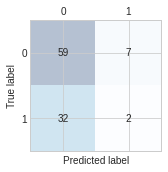

In [104]:
import matplotlib.pyplot as plt #그림을 그려주는 모듈
plt.style.use(['seaborn-whitegrid'])
fig,ax=plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
      ax.text(x=j,y=i, s=confmat[i,j],va='center',ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

## Gradient boosting & CV

In [136]:
param_grid=[{
'learning_rate':[1,3,5,7,9,11],
'n_estimators':[1,3,5,7,9,11],
'subsample':[1,3,5,7,9,11]}]

In [137]:
gs = GridSearchCV(
    estimator  = GradientBoostingClassifier(),
    param_grid=param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [138]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
900 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 317, in _check_params
    raise ValueError("subsample must be in (0,1] but was %r" % self.subsample)
ValueError: subsampl

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=2,
             param_grid=[{'learning_rate': [1, 3, 5, 7, 9, 11],
                          'n_estimators': [1, 3, 5, 7, 9, 11],
                          'subsample': [1, 3, 5, 7, 9, 11]}],
             verbose=True)

In [139]:
gs.best_estimator_
print('GridSearchCV best score : {}'.format(gs.best_score_))

GridSearchCV best score : 0.6933333333333332


In [140]:
predict=gs.predict(X_test)

In [141]:
from sklearn.metrics import confusion_matrix

confmat=confusion_matrix(y_true=y_test, y_pred=predict)
print(confmat)

[[56 10]
 [27  7]]


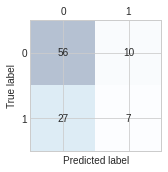

In [142]:
import matplotlib.pyplot as plt #그림을 그려주는 모듈
plt.style.use(['seaborn-whitegrid'])
fig,ax=plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
      ax.text(x=j,y=i, s=confmat[i,j],va='center',ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

##adaboost & CV

In [145]:
param_grid=[{
'learning_rate':[1,3,5,7,9,11],
'n_estimators':[1,3,5,7,9,11]}]

In [146]:
gs = GridSearchCV(
    estimator  = AdaBoostClassifier(),
    param_grid=param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [147]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=2,
             param_grid=[{'learning_rate': [1, 3, 5, 7, 9, 11],
                          'n_estimators': [1, 3, 5, 7, 9, 11]}],
             verbose=True)

In [148]:
gs.best_estimator_
print('GridSearchCV best score : {}'.format(gs.best_score_))

GridSearchCV best score : 0.7233333333333334


In [149]:
predict=gs.predict(X_test)

In [150]:
from sklearn.metrics import confusion_matrix

confmat=confusion_matrix(y_true=y_test, y_pred=predict)
print(confmat)

[[55 11]
 [27  7]]


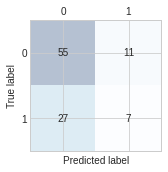

In [151]:
import matplotlib.pyplot as plt #그림을 그려주는 모듈
plt.style.use(['seaborn-whitegrid'])
fig,ax=plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
      ax.text(x=j,y=i, s=confmat[i,j],va='center',ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

##random forest & CV

In [152]:
param_grid=[{
'n_estimators':[10,15,20,25,30,35],
'max_depth':[1,3,5,7,9,11]}]

In [153]:
gs = GridSearchCV(
    estimator  = RandomForestClassifier(),
    param_grid=param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [154]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=2,
             param_grid=[{'max_depth': [1, 3, 5, 7, 9, 11],
                          'n_estimators': [10, 15, 20, 25, 30, 35]}],
             verbose=True)

In [155]:
gs.best_estimator_
print('GridSearchCV best score : {}'.format(gs.best_score_))

GridSearchCV best score : 0.71


In [156]:
predict=gs.predict(X_test)

In [157]:
from sklearn.metrics import confusion_matrix

confmat=confusion_matrix(y_true=y_test, y_pred=predict)
print(confmat)

[[64  2]
 [29  5]]


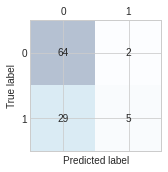

In [158]:
import matplotlib.pyplot as plt #그림을 그려주는 모듈
plt.style.use(['seaborn-whitegrid'])
fig,ax=plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
      ax.text(x=j,y=i, s=confmat[i,j],va='center',ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

##regression

In [117]:
reg_data = pd.read_csv(
"https://stats.idre.ucla.edu/wp-content/uploads/2019/02/elemapi2v2.csv")

In [118]:
#Splitting featuers and target
X = data.drop('admit', axis=1)
y = data['admit']

In [119]:
np.random.rand(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.describe()

,gre,gpa
count,300.000000,300.000000
mean,584.333333,3.373067
std,116.635766,0.377847
min,220.000000,2.420000
25%,500.000000,3.087500
50%,580.000000,3.365000
75%,660.000000,3.650000
max,800.000000,4.000000


## bagging & CV

In [174]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor , AdaBoostRegressor,RandomForestRegressor

In [164]:
param_grid=[{
'n_estimators':[1,5,10,15,20,25],
'max_samples':[1,3,5,7,9,11]}]

In [165]:
gs = GridSearchCV(
    estimator  =BaggingRegressor(),
    param_grid=param_grid,
    verbose=True
)

In [166]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=BaggingRegressor(),
             param_grid=[{'max_samples': [1, 3, 5, 7, 9, 11],
                          'n_estimators': [1, 5, 10, 15, 20, 25]}],
             verbose=True)

In [167]:
predict = gs.predict(X_test)

In [168]:
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 

In [169]:
def MPE(y_test, y_pred): 
	return np.mean((y_test - y_pred) / y_test) * 100

In [171]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print('RMSE : {}'.format(sqrt(mean_squared_error(predict, y_test))))
print('MAE : {}'.format(mean_absolute_error(y_test, predict)))
print('MSE : {}'.format(mean_squared_error(predict, y_test)))

RMSE : 0.4666904755831214
MAE : 0.41100000000000003
MSE : 0.21780000000000002


#Gradient regressor & CV

In [126]:
param_grid=[{
'n_estimators':[1,30,60,90,120,150,180],
'learning_rate':[0.01,0.05,0.1,0.5,1]}]


In [127]:
gs = GridSearchCV(
    estimator  =GradientBoostingRegressor(),
    param_grid=param_grid,
    verbose=True
)

In [128]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid=[{'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                          'n_estimators': [1, 30, 60, 90, 120, 150, 180]}],
             verbose=True)

In [129]:
predict = gs.predict(X_test)

In [130]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print('RMSE : {}'.format(sqrt(mean_squared_error(predict, y_test))))
print('MAE : {}'.format(mean_absolute_error(y_test, predict)))
print('MSE : {}'.format(mean_squared_error(predict, y_test)))

RMSE : 0.47068325257282173
MAE : 0.42379660085637366
MSE : 0.2215427242525307


#adaboost & CV

In [131]:
param_grid=[{
'n_estimators':[1,30,60,90,120,150,180],
'learning_rate':[0.05,0.1,0.5,1,1.5,2]}]


In [132]:
gs = GridSearchCV(
    estimator  =AdaBoostRegressor(),
    param_grid=param_grid,
    verbose=True
)

In [133]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid=[{'learning_rate': [0.05, 0.1, 0.5, 1, 1.5, 2],
                          'n_estimators': [1, 30, 60, 90, 120, 150, 180]}],
             verbose=True)

In [134]:
predict = gs.predict(X_test)

In [135]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print('RMSE : {}'.format(sqrt(mean_squared_error(predict, y_test))))
print('MAE : {}'.format(mean_absolute_error(y_test, predict)))
print('MSE : {}'.format(mean_squared_error(predict, y_test)))

RMSE : 0.4635205794206367
MAE : 0.4174148413817413
MSE : 0.21485132754644276


#randomforest & CV


In [176]:
n_estimators = [5, 20, 50, 100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [177]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, random_state = 42, n_jobs = -1)
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=42)

In [178]:
predict = rf_random.predict(X_test)

In [179]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print('RMSE : {}'.format(sqrt(mean_squared_error(predict, y_test))))
print('MAE : {}'.format(mean_absolute_error(y_test, predict)))
print('MSE : {}'.format(mean_squared_error(predict, y_test)))

RMSE : 0.4722924724415709
MAE : 0.41122351191162865
MSE : 0.22306017952497204
